In [26]:
import shap
import numpy as np
import pandas as pd
import catboost as cb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
    
shap.initjs()

In [27]:
X, y = shap.datasets.communitiesandcrime()

In [28]:
simple_df = X[['PctKidsBornNeverMar', 'racepctblack']]

In [29]:
tree_model = DecisionTreeRegressor(max_depth=2, random_state=3, splitter='random', criterion='mae')

In [30]:
tree_model.fit(simple_df, y)

DecisionTreeRegressor(criterion='mae', max_depth=2, random_state=3,
                      splitter='random')

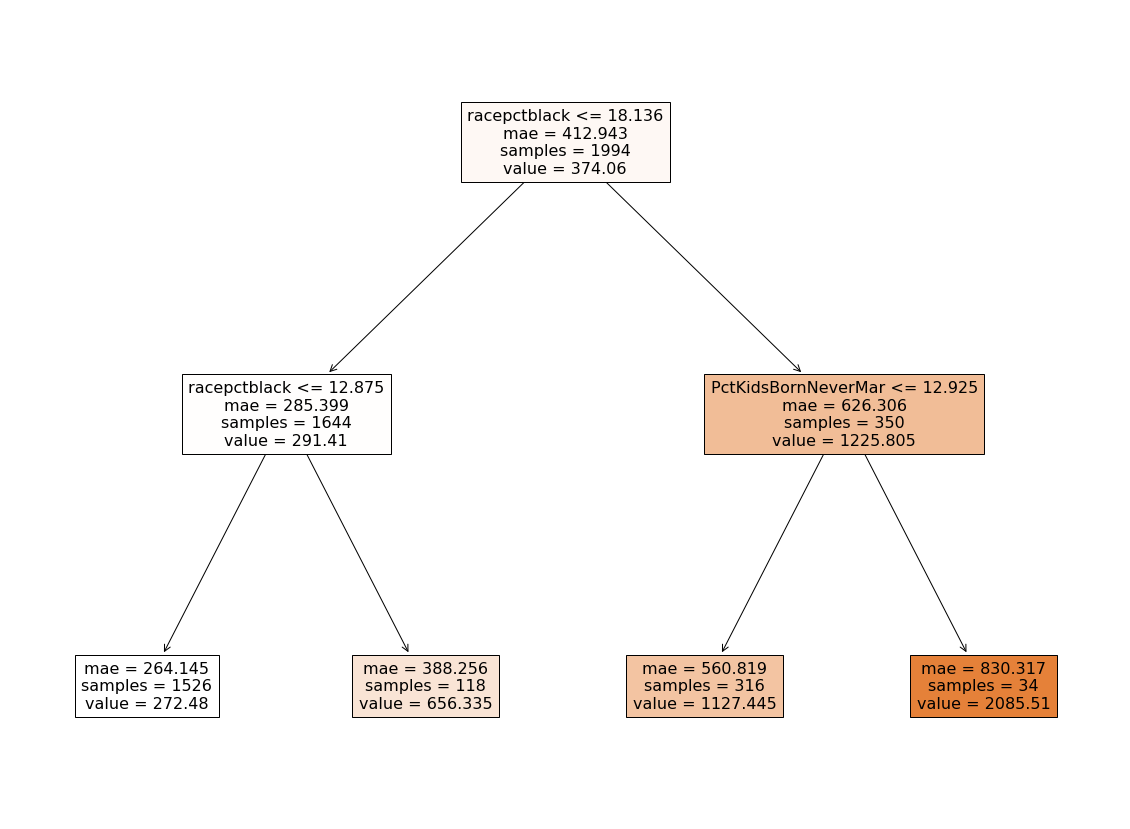

In [31]:
plt.figure(figsize=(20, 15))
tree.plot_tree(tree_model, feature_names=simple_df.columns, filled=True);

In [32]:
tree_model.feature_importances_

array([0.08137607, 0.91862393])

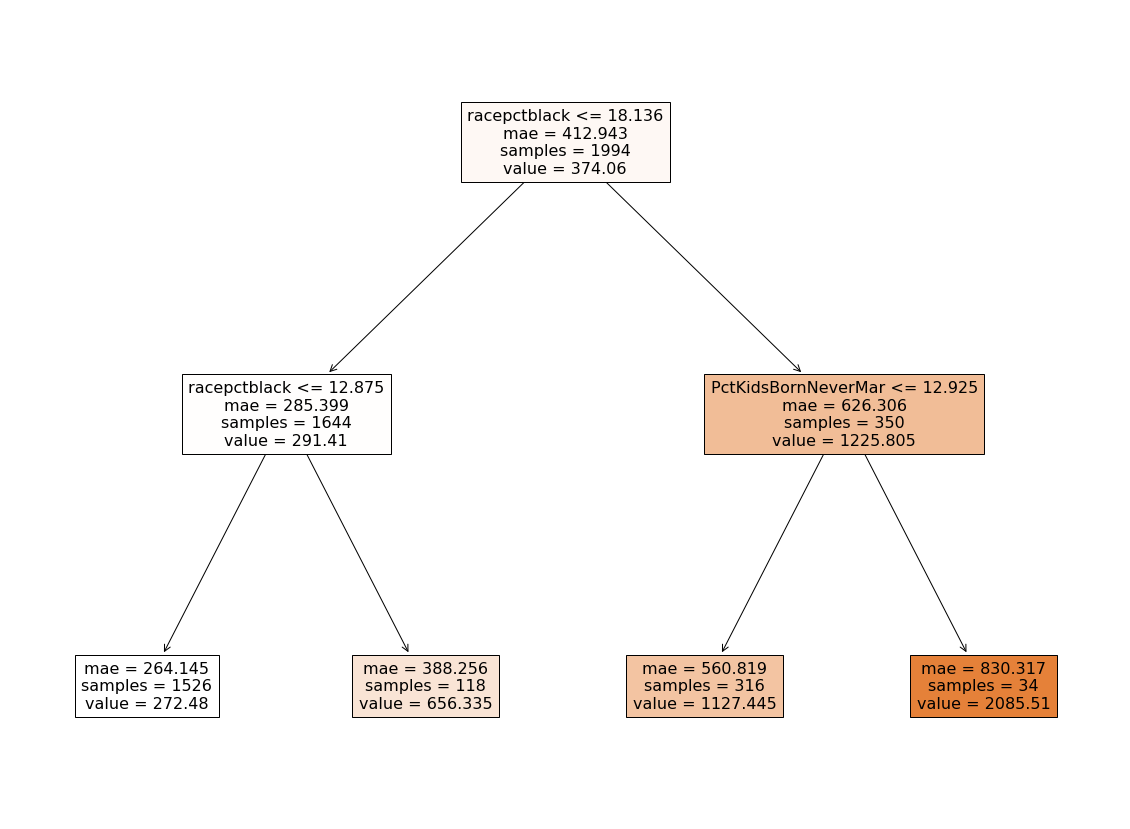

In [34]:
plt.figure(figsize=(20, 15))
tree.plot_tree(tree_model, feature_names=simple_df.columns, filled=True);

In [35]:
1526/1994*272.48 + 118/1994*656.34 + 316/1994*1127.45 + 34/1994*2085.51

461.60187562688066

In [36]:
316/350*1127 + 34/350*2085

1220.0628571428572

In [41]:
explainer = shap.TreeExplainer(tree_model)
shap_values = explainer(simple_df)

In [42]:
simple_df.iloc[86]

PctKidsBornNeverMar    15.07
racepctblack           36.14
Name: 99, dtype: float64

In [43]:
shap.plots.force(shap_values[86])

In [44]:
shap_values[86]

.values =
array([ 508.41279392, 1115.49641871])

.base_values =
array([461.60078736])

.data =
array([15.07, 36.14])

In [14]:
X

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
0,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,...,0,10.66,53.72,65.29,78.09,89.14,6.5,1845.9,9.63,0.0
1,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,...,0,8.30,77.17,71.27,90.22,96.12,10.6,2186.7,3.84,0.0
2,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,...,0,5.00,44.77,36.60,61.26,82.85,10.6,2780.9,4.37,0.0
3,16656,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,17.57,...,0,2.04,88.71,56.70,90.17,96.24,5.2,3217.7,3.31,0.0
5,140494,2.45,2.51,95.65,0.90,0.95,18.09,32.89,20.04,13.26,...,4,1.49,64.35,42.29,70.61,85.66,70.4,1995.7,0.97,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,56216,3.07,6.87,61.68,15.23,29.86,15.46,30.16,14.34,8.08,...,0,18.90,52.67,39.19,74.58,85.88,16.7,3365.4,0.59,0.0
2211,12251,2.68,21.18,76.65,1.52,1.29,17.36,31.23,16.97,12.57,...,0,2.24,75.16,49.12,78.79,92.85,7.3,1682.8,1.15,0.0
2212,32824,2.46,0.52,92.62,0.98,11.00,11.81,20.96,9.53,20.73,...,0,7.35,48.66,46.73,75.54,92.30,27.5,1195.2,0.12,0.0
2213,13547,2.89,3.37,69.91,0.90,62.11,17.16,30.01,14.73,10.42,...,0,2.28,82.26,54.05,79.72,94.06,6.3,2142.2,0.00,0.0


In [15]:
y

array([ 41.02, 127.56, 218.59, ..., 353.83, 691.17, 918.89])

In [16]:
X.shape

(1994, 101)

In [17]:
cb_model = cb.CatBoostRegressor()
cb_model.fit(X, y, verbose=0)

In [18]:
explainer = shap.Explainer(cb_model)
shap_values = explainer(X)

In [19]:
print(f'Base value=Среднее кол-во преступлений={y.mean()}')

Base value=Среднее кол-во преступлений=589.078921765296


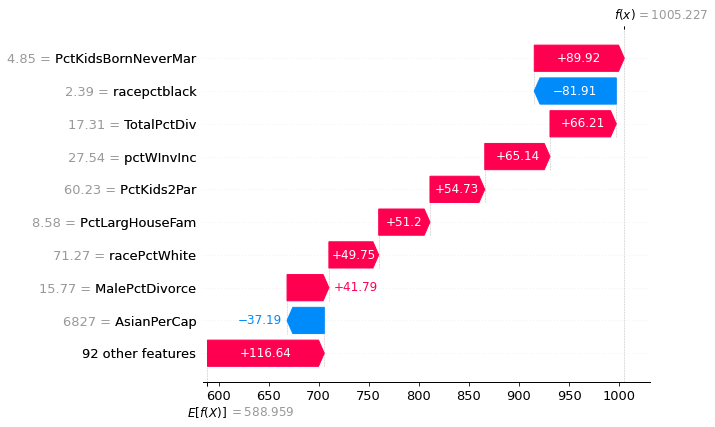

In [20]:
shap.plots.waterfall(shap_values[1993])

In [21]:
X['racepctblack'].mean()

9.509694082246737

In [22]:
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[1993])

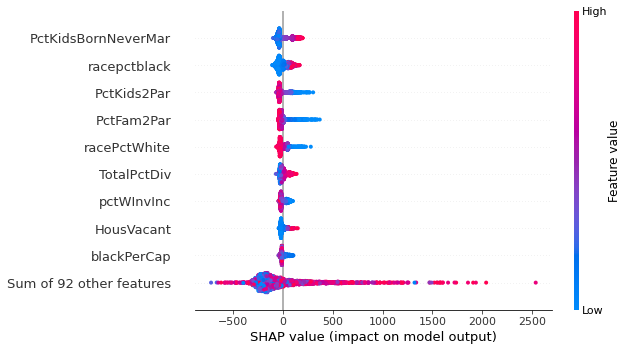

In [23]:
shap.plots.beeswarm(shap_values)

In [24]:
explainer = shap.Explainer(cb_model)
shap_values = explainer(X)

In [25]:
shap.plots.force(shap_values[-500:])

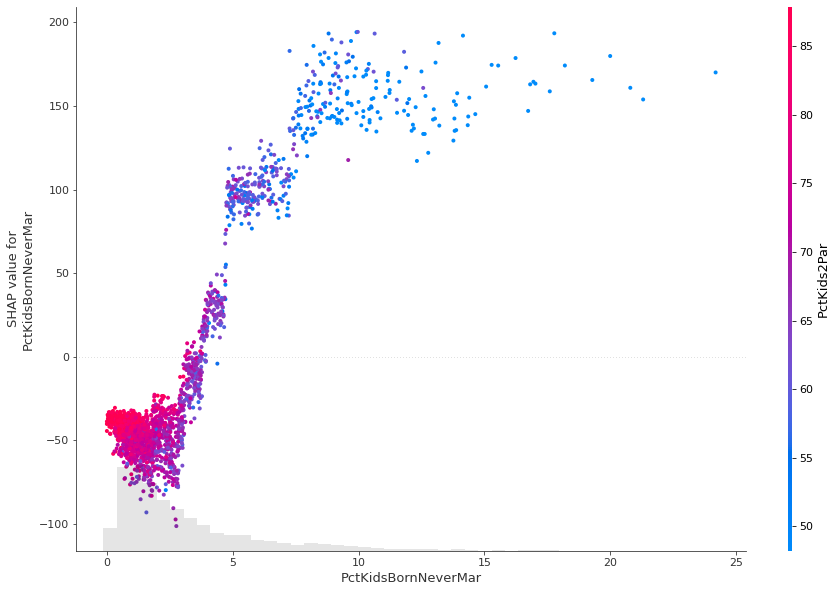

In [95]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
shap.plots.scatter(shap_values[:,"PctKidsBornNeverMar"], color=shap_values, ax=ax)

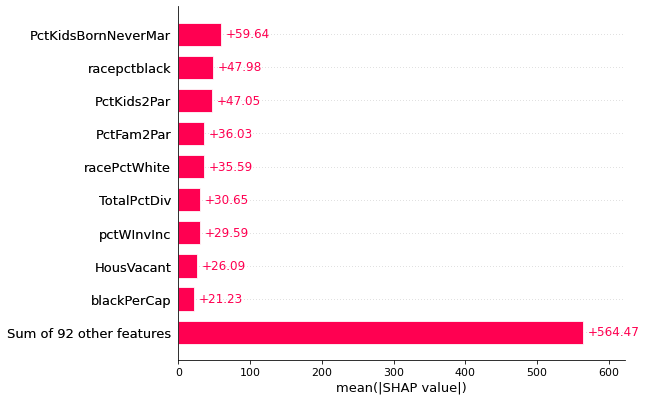

In [96]:
shap.plots.bar(shap_values)